In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N01 = np.random.normal(0,1,size=[200, 2])
N12 = np.random.normal(4,1,size=[200, 2])

x0 = []
y0 = []
for i in range(len(N01)):
    x0.append(N01[i][0])
    y0.append(N01[i][1])
    
x1 = []
y1 = []
for i in range(len(N12)):
    x1.append(N12[i][0])
    y1.append(N12[i][1])

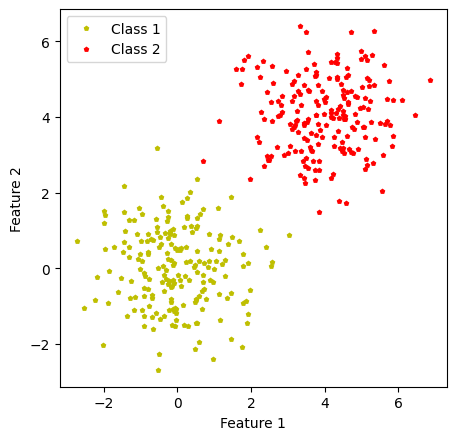

In [3]:
fig = plt.figure(figsize=(5,5), dpi = 100)
plt.plot(x0, y0, 'yp', markersize=3)
plt.plot(x1, y1, 'rp', markersize=3)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(['Class 1','Class 2'])
plt.show()

In [4]:
y_1 = np.zeros(len(N01))
y_2 = np.ones(len(N12))

In [5]:
from sklearn.model_selection import train_test_split

X = np.concatenate([N01, N12])
y = np.concatenate([y_1, y_2])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
print (np.shape(X_train))
print (np.shape(y_train))
print (np.shape(X_test))
print (np.shape(y_test))

(268, 2)
(268,)
(132, 2)
(132,)


In [7]:
anim_decsn = []

def step_func(z):
        return 1.0 if (z > 0) else 0.0

def perceptron(X, y, lr, epochs):
    
    m, n = X.shape
    
    theta = np.zeros((n+1,1))
    theta_batch = np.zeros((m, n+1, 1))
    
    for i in range(n+1):
        theta[i][0] = random.random()
    
    n_miss_list = []
    
    # Training.
    for epoch in range(epochs):
        
        # variable to store #misclassified.
        n_miss = 0
        
        # looping for every example.
        for idx, x_i in enumerate(X):
            
            # Insering 1 for bias, X0 = 1.
            x_i = np.insert(x_i, 0, 1).reshape(-1,1)
            
            # Calculating prediction/hypothesis.
            y_hat = step_func(np.dot(x_i.T, theta))
            
            # Updating if the example is misclassified.
            if (np.squeeze(y_hat) - y[idx]) != 0:
                theta_batch[idx] += lr*((y[idx] - y_hat)*x_i)
                
                # Incrementing by 1.
                n_miss += 1
              
        sum = 0
        for i in range(m):
            sum += theta_batch[i]
        theta = sum/m
        
        # Appending number of misclassified examples
        # at every iteration.
        n_miss_list.append(n_miss)
        anim_decsn.append(theta)
        
    return theta, n_miss_list

In [8]:
def plot_decision_boundary(X, theta):
    
    x1 = [min(X_train[:,0]), max(X_train[:,0])]
    m = -theta[1]/theta[2]
    c = -theta[0]/theta[2]
    x2 = m*x1 + c
    
    fig = plt.figure(figsize=(5,5), dpi = 100)
    plt.plot(X_train[:, 0][y_train==0], X_train[:, 1][y_train==0], "yp", markersize=3)
    plt.plot(X_train[:, 0][y_train==1], X_train[:, 1][y_train==1], "rp", markersize=3)
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.legend(['Class 1','Class 2'])
    plt.title('Perceptron Algorithm')
    plt.plot(x1, x2, 'y-')

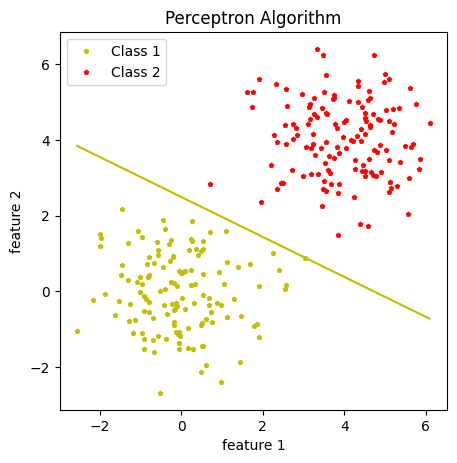

In [9]:
theta, miss_l = perceptron(X_train, y_train, 0.5, 150)
plot_decision_boundary(X_train, theta)

Text(0, 0.5, 'Error')

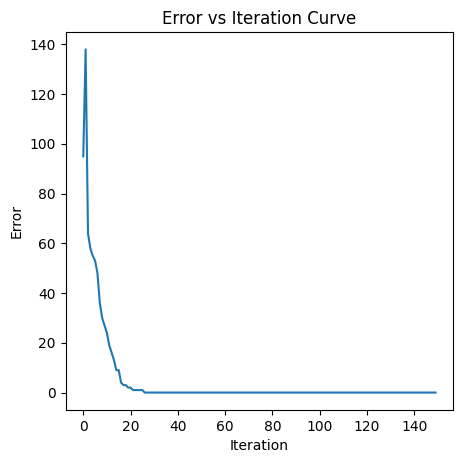

In [10]:
fig = plt.figure(figsize=(5,5), dpi = 100)
plt.plot(miss_l)
plt.title('Error vs Iteration Curve')
plt.xlabel('Iteration')
plt.ylabel('Error')

In [11]:
from matplotlib.animation import FuncAnimation 
from IPython import display

# initializing a figure in which the graph will be plotted
fig = plt.figure() 
 
# marking the x-axis and y-axis
axis = plt.axes(xlim =(min(X[:,0]) - 2, max(X[:,0]) + 2), 
                ylim =(min(X[:,1]) - 2, max(X[:,1]) + 2))
  
# initializing a line variable
line, = axis.plot([], [], lw = 3) 
   
# data which the line will contain (x, y)
def init(): 
    line.set_data([], [])
    return line,

def animate(i):  
    plt.plot(X_train[:, 0][y_train == 0], X_train[:, 1][y_train == 0], 'yp', markersize = 1)
    plt.plot(X_train[:, 0][y_train == 1], X_train[:, 1][y_train == 1], 'rp', markersize = 1)
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -anim_decsn[i][1]/anim_decsn[i][2]
    c = -anim_decsn[i][0]/anim_decsn[i][2]
    x2 = m*x1 + c
    
    line.set_data(x1, x2)
    return line,

anim = FuncAnimation(fig, animate, frames = 110, repeat = True, blit = True)  # frames = epochs

video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

In [12]:
def predict(weights, test):
  activation = weights[0] + weights[1]*test[0] + weights[2]*test[1]
  return 1.0 if activation > 0.0 else 0.0

y_pred = []
for i in range(len(X_test)):
  y_pred.append(predict(theta, X_test[i]))

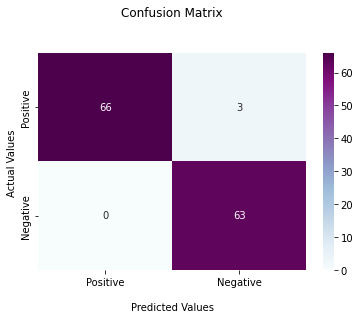

In [13]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix1 = confusion_matrix(y_test, y_pred)
import seaborn as sns

ax = sns.heatmap(cf_matrix1, annot=True, cmap='BuPu')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Positive', 'Negative'])
ax.yaxis.set_ticklabels(['Positive', 'Negative'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [14]:
from sklearn import metrics
print('Performance Report (Accuracy score on test set) :', format(metrics.accuracy_score(y_test, y_pred), '.2f'),'\n\n')
print('True positive: ', cf_matrix1[0][0])
print('False positive: ', cf_matrix1[0][1])
print('False Negative: ', cf_matrix1[1][0])
print('True Negative: ', cf_matrix1[1][1],'\n\n')
target=[str(i) for i in range(2)]
print('Classification Report'.center(65,'-'),'\n', metrics.classification_report(y_test, y_pred,target_names=target))

Performance Report (Accuracy score on test set) : 0.98 


True positive:  66
False positive:  3
False Negative:  0
True Negative:  63 


----------------------Classification Report---------------------- 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        69
           1       0.95      1.00      0.98        63

    accuracy                           0.98       132
   macro avg       0.98      0.98      0.98       132
weighted avg       0.98      0.98      0.98       132



# **Perceptron on Iris data**

In [15]:
import pandas as pd
iris_1 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
iris_1.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
iris = iris_1[:100]
iris.shape

(100, 5)

In [17]:
X1 = iris.drop([4],axis=1)
y = np.concatenate([np.zeros(50),np.ones(50)])
X = X1.to_numpy()

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print (np.shape(X_train))
print (np.shape(y_train))
print (np.shape(X_test))
print (np.shape(y_test))

(80, 4)
(80,)
(20, 4)
(20,)


In [19]:
theta, miss_l = perceptron(X_train, y_train, 0.5, 150)

In [20]:
def predict(weights, test):
  activation = weights[0] + weights[1]*test[0] + weights[2]*test[1] + weights[3]*test[2] + weights[4]*test[3]
  return 1.0 if activation > 0.0 else 0.0

y_pred = []
for i in range(len(X_test)):
  y_pred.append(predict(theta, X_test[i]))

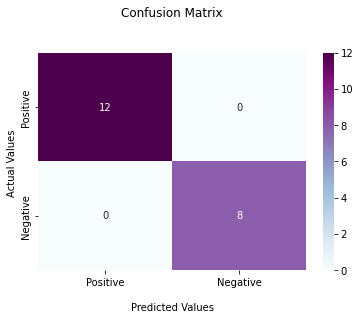

In [21]:
#Generate the confusion matrix
cf_matrix2 = confusion_matrix(y_test, y_pred)
import seaborn as sns

ax = sns.heatmap(cf_matrix2, annot=True, cmap='BuPu')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Positive', 'Negative'])
ax.yaxis.set_ticklabels(['Positive', 'Negative'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [22]:
print('Performance Report (Accuracy score on test set) :', format(metrics.accuracy_score(y_test, y_pred), '.2f'),'\n\n')
print('True positive: ', cf_matrix2[0][0])
print('False positive: ', cf_matrix2[0][1])
print('False Negative: ', cf_matrix2[1][0])
print('True Negative: ', cf_matrix2[1][1],'\n\n')
target=[str(i) for i in range(2)]
print('Classification Report'.center(65,'-'),'\n', metrics.classification_report(y_test, y_pred,target_names=target))

Performance Report (Accuracy score on test set) : 1.00 


True positive:  12
False positive:  0
False Negative:  0
True Negative:  8 


----------------------Classification Report---------------------- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

